In [9]:
!pip install matplotlib
!pip install seaborn

!pip install scikit-learn
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 16.8 MB/s eta 0:00:08
   -- ------------------------------------- 7.1/124.9 MB 20.8 MB/s eta 0:00:06
   ---- ----------------------------------- 14.2/124.9 MB 25.4 MB/s eta 0:00:05
   ------- -------------------------------- 23.1/124.9 MB 29.8 MB/s eta 0:00:04
   ---------- ----------------------------- 33.3/124.9 MB 34.1 MB/s eta 0:00:03
   ------------- -------------------------- 41.9/124.9 MB 35.1 MB/s eta 0:00:03
   ---------------- ----------------------- 51.6/124.9 MB 36.9 MB/s eta 0:00:02
   ------------------- -------------------- 61.9/124.9 MB 38.6 MB/s eta 0:00:02
   ---------------------- ----------------- 68.9/124.9 MB 39.6 MB/s eta 0:00:02
   ------------------------- -------------- 80.7/124.9 MB 39.9 MB/s eta 0:00:02
   ----------------------------- ---------- 91.2/124.9 MB 41.0 MB/s eta 0:00:01
   ------------------------------- ------- 102.0/12


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [25]:
df = pd.read_csv("symbipredict_2022.csv")

df = df.drop(columns=['fluid_overload'])

print(df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

*SPLIT*

In [4]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# First, split the data into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Then, split the train set into train and validation sets (75% train, 25% validation of the original train set)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

# Verify the sizes of the splits
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

print(train_df.head())
print(val_df.head())
print(test_df.head())

Training set size: 2976
Validation set size: 992
Test set size: 993
      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
1027        1          0                     0                    0   
611         1          0                     0                    0   
3868        1          0                     0                    0   
4037        0          0                     0                    0   
4680        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1027          0       0           0             0        0                 0   
611           0       0           0             0        0                 0   
3868          0       0           0             0        0                 0   
4037          0       0           1             0        0                 0   
4680          0       0           0             0        0                 0   

      ...  blackheads  s

*TRAINING*

Number of duplicate rows: 4657
Dataset size after removing duplicates: 304
Training set size: 182
Validation set size: 61
Test set size: 61

Random Forest Validation Accuracy: 0.92
Random Forest Test Accuracy: 0.97
Random Forest Classification Report:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       0.60      1.00      0.75         3
          Alcoholic Hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         3
             Bronchial Asthma       1.00      1.00      1.00         3
         Cervical Spondylosis       1.00      1.00      1.00         1
                   Chickenpox       1.00      1.00      1.00         3
          Chronic Cholestasis       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         3
                    Diabetes        1

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2560\2632322460.py:69: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classif


XGBoost Validation Accuracy: 0.82
XGBoost Test Accuracy: 0.82
XGBoost Classification Report:
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00         1
                         Acne       0.00      0.00      0.00         3
          Alcoholic Hepatitis       1.00      1.00      1.00         1
                      Allergy       0.00      0.00      0.00         3
             Bronchial Asthma       1.00      1.00      1.00         3
         Cervical Spondylosis       0.00      0.00      0.00         1
                   Chickenpox       1.00      1.00      1.00         3
          Chronic Cholestasis       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         3
                    Diabetes        1.00      1.00      1.00         2
Dimorphic Hemmorhoids (piles)       0.17      1.00      0.29         2
                Drug Reaction       1.00      1.00   

c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi


Random Forest Cross-Validation Accuracy: 0.97 ± 0.03

Logistic Regression Cross-Validation Accuracy: 0.99 ± 0.01

Support Vector Machine Cross-Validation Accuracy: 0.97 ± 0.01

XGBoost Cross-Validation Accuracy: 0.94 ± 0.04


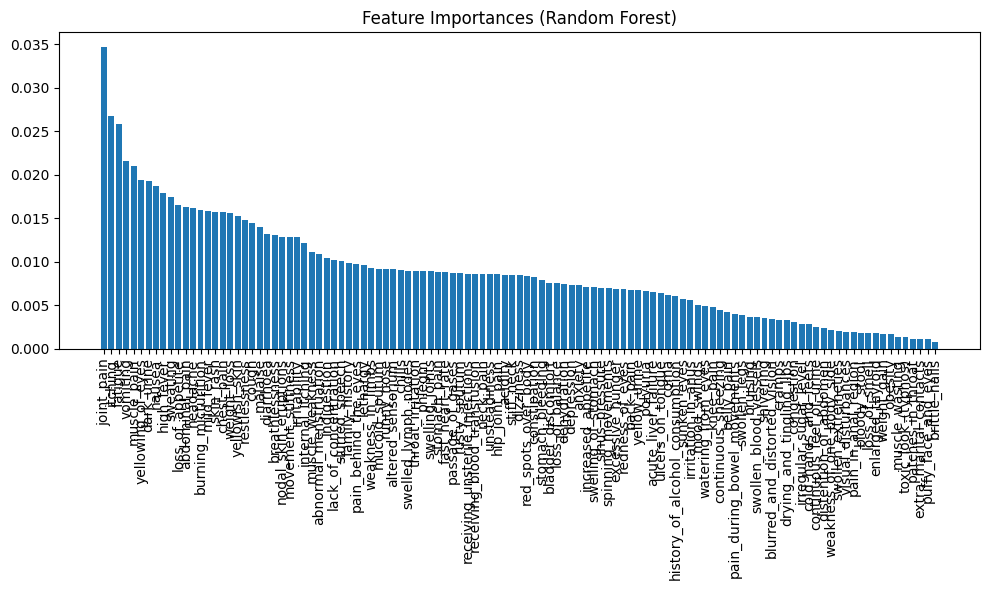

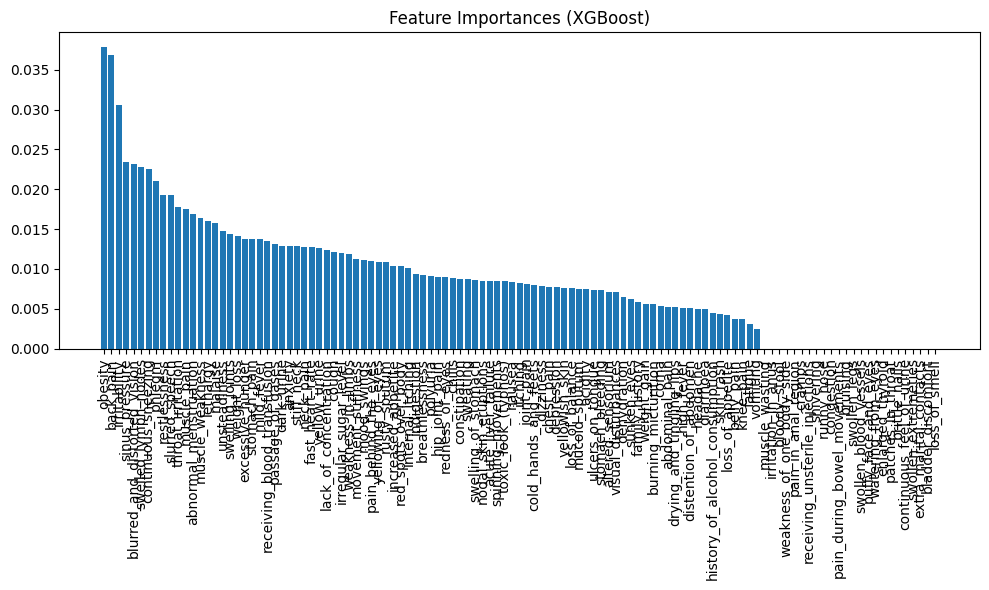

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Import XGBoost
from xgboost import XGBClassifier

# --- 1. LOAD YOUR DATA ---
df = pd.read_csv("symbipredict_2022.csv")

# --- 2. DEFINE & CLEAN THE SYMPTOMS LIST ---
symptoms = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
    'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
    'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
    'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
    'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
    'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness',
    'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin',
    'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
    'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
    'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach',
    'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm',
    'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose',
    'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
    'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
    'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising',
    'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
    'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger',
    'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech',
    'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
    'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness',
    'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort',
    'foul_smell_of_urine', 'continuous_feel_of_urine', 'passage_of_gases',
    'internal_itching', 'toxic_look_(typhos)', 'depression', 'irritability',
    'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain',
    'abnormal_menstruation', 'dischromic_patches', 'watering_from_eyes',
    'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum',
    'rusty_sputum', 'lack_of_concentration', 'visual_disturbances',
    'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma',
    'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption'
]

# --- 3. PREPROCESS THE DATAFRAME ---
if 'fluid_overload' in df.columns:
    df = df.drop(columns=['fluid_overload'])

existing_symptoms = [symptom for symptom in symptoms if symptom in df.columns]
if not existing_symptoms:
    raise ValueError("None of the specified symptom columns were found in the DataFrame.")

X = df[existing_symptoms]
y = df['prognosis']

# Remove duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
X = df[existing_symptoms]
y = df['prognosis']
print(f"Dataset size after removing duplicates: {len(df)}")

# Ensure binary encoding for symptom columns
X = X.applymap(lambda x: 1 if x > 0 else 0)

# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert string labels to integers

# Split the dataset
train_X, test_X, train_y, test_y = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=42)

print(f"Training set size: {len(train_X)}")
print(f"Validation set size: {len(val_X)}")
print(f"Test set size: {len(test_X)}")

# --- 4. MODEL TRAINING & EVALUATION ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',  # Multi-class classification
        num_class=len(np.unique(y_encoded)),  # Number of classes
        random_state=42,
        n_estimators=100,  # Number of boosting rounds
        max_depth=6,       # Maximum depth of a tree
        learning_rate=0.1, # Step size shrinkage
        subsample=0.8,     # Subsample ratio of the training instances
        colsample_bytree=0.8  # Subsample ratio of columns when constructing each tree
    )
}

for model_name, model in models.items():
    # Train the model on the training data
    model.fit(train_X, train_y)
    
    # Evaluate on the validation set
    val_predictions = model.predict(val_X)
    val_accuracy = accuracy_score(val_y, val_predictions)
    print(f"\n{model_name} Validation Accuracy: {val_accuracy:.2f}")
    
    # Evaluate on the test set
    test_predictions = model.predict(test_X)
    test_accuracy = accuracy_score(test_y, test_predictions)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")
    
    # Decode predictions back to original labels for classification report
    test_predictions_decoded = label_encoder.inverse_transform(test_predictions)
    test_y_decoded = label_encoder.inverse_transform(test_y)
    print(f"{model_name} Classification Report:\n{classification_report(test_y_decoded, test_predictions_decoded)}")

# --- 5. CROSS-VALIDATION FOR ROBUSTNESS ---
for model_name, model in models.items():
    scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
    print(f"\n{model_name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

# --- 6. FEATURE IMPORTANCE VISUALIZATION (FOR RANDOM FOREST AND XGBOOST) ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_X, train_y)

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(train_X, train_y)

# Plot feature importance for Random Forest
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(rf_indices)), rf_importances[rf_indices], align="center")
plt.xticks(range(len(rf_indices)), [existing_symptoms[i] for i in rf_indices], rotation=90)
plt.tight_layout()
plt.show()

# Plot feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(len(xgb_indices)), xgb_importances[xgb_indices], align="center")
plt.xticks(range(len(xgb_indices)), [existing_symptoms[i] for i in xgb_indices], rotation=90)
plt.tight_layout()
plt.show()

Number of duplicate rows: 4657
Dataset size after removing duplicates: 304
Training set size: 182
Validation set size: 61
Test set size: 61

--- Training Random Forest ---
Random Forest Validation Accuracy: 0.97
Random Forest Test Accuracy: 0.98
Random Forest Classification Report:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       0.50      1.00      0.67         1
          Alcoholic Hepatitis       1.00      1.00      1.00         2
                      Allergy       1.00      1.00      1.00         1
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical Spondylosis       1.00      1.00      1.00         1
                   Chickenpox       1.00      1.00      1.00         2
          Chronic Cholestasis       1.00      1.00      1.00         2
      

c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

XGBoost Validation Accuracy: 0.93
XGBoost Test Accuracy: 0.95
XGBoost Classification Report:
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00         1
                         Acne       0.50      1.00      0.67         1
          Alcoholic Hepatitis       1.00      1.00      1.00         2
                      Allergy       1.00      1.00      1.00         1
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical Spondylosis       1.00      1.00      1.00         1
                   Chickenpox       1.00      1.00      1.00         2
          Chronic Cholestasis       1.00      1.00      1.00         2
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         2
                    Diabetes        1.00      1.00    

c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\WELCOME\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Random Forest Cross-Validation Accuracy: 0.98 ± 0.01
Logistic Regression Cross-Validation Accuracy: 0.99 ± 0.01
Support Vector Machine Cross-Validation Accuracy: 0.98 ± 0.01
XGBoost Cross-Validation Accuracy: 0.94 ± 0.02


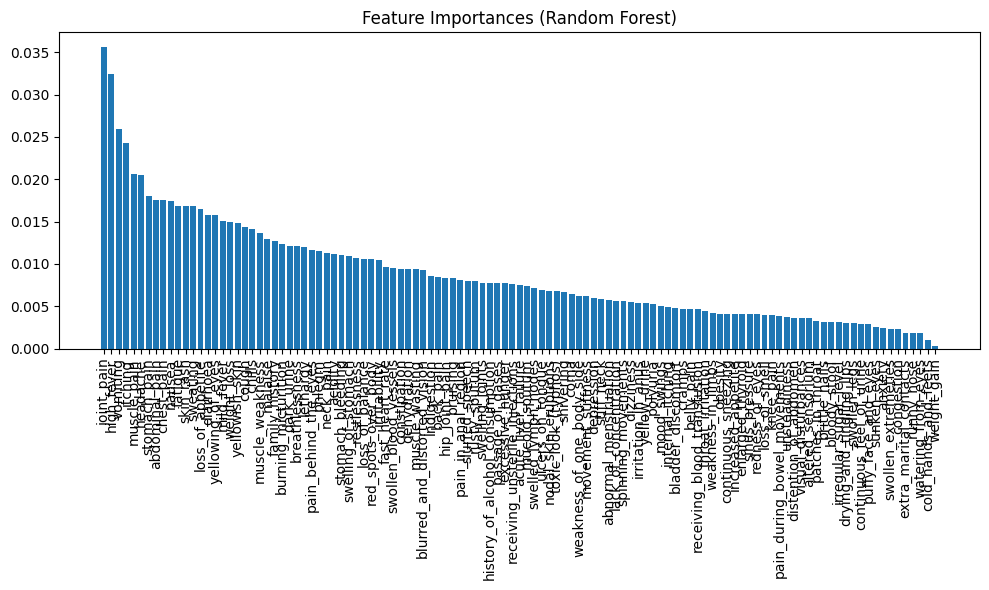

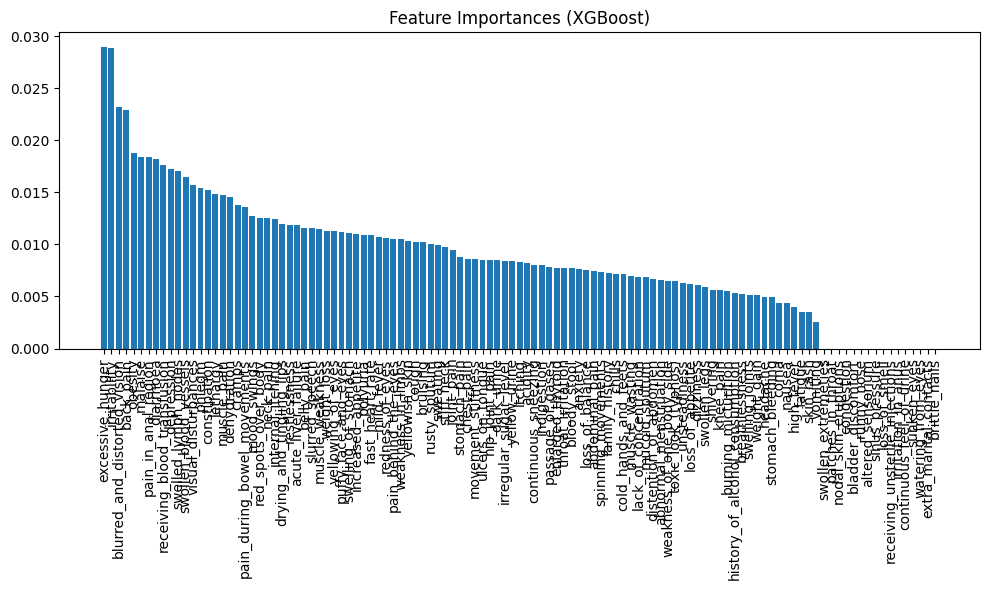

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Import XGBoost
from xgboost import XGBClassifier

# -------------------------------
# 1. LOAD YOUR DATA
# -------------------------------
df = pd.read_csv("symbipredict_2022.csv")

# -------------------------------
# 2. DEFINE & CLEAN THE SYMPTOMS LIST
# -------------------------------
symptoms = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
    'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
    'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
    'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
    'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
    'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness',
    'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin',
    'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
    'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
    'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach',
    'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm',
    'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose',
    'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
    'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
    'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising',
    'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
    'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger',
    'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech',
    'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
    'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness',
    'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort',
    'foul_smell_of_urine', 'continuous_feel_of_urine', 'passage_of_gases',
    'internal_itching', 'toxic_look_(typhos)', 'depression', 'irritability',
    'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain',
    'abnormal_menstruation', 'dischromic_patches', 'watering_from_eyes',
    'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum',
    'rusty_sputum', 'lack_of_concentration', 'visual_disturbances',
    'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma',
    'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption'
]

# Remove "fluid_overload" if present
if 'fluid_overload' in df.columns:
    df = df.drop(columns=['fluid_overload'])

# Filter symptoms that actually exist in the DataFrame
existing_symptoms = [symptom for symptom in symptoms if symptom in df.columns]
if not existing_symptoms:
    raise ValueError("None of the specified symptom columns were found in the DataFrame.")

# -------------------------------
# 3. PREPROCESS THE DATAFRAME
# -------------------------------
# Define features and target
X = df[existing_symptoms]
y = df['prognosis']

# Report duplicate rows and remove them
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Dataset size after removing duplicates: {len(df)}")

# Reassign X and y after duplicate removal
X = df[existing_symptoms]
y = df['prognosis']

# Binary encode the symptom columns (using vectorized approach)
X = (X > 0).astype(int)

# Encode target labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# -------------------------------
# 4. SPLIT THE DATA (STRATIFIED)
# -------------------------------
# Use stratified splitting to maintain class proportions
train_X, test_X, train_y, test_y = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
train_X, val_X, train_y, val_y = train_test_split(
    train_X, train_y, test_size=0.25, random_state=42, stratify=train_y)

print(f"Training set size: {len(train_X)}")
print(f"Validation set size: {len(val_X)}")
print(f"Test set size: {len(test_X)}")

# -------------------------------
# 5. MODEL TRAINING & EVALUATION
# -------------------------------
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',  # for multi-class classification
        num_class=len(np.unique(y_encoded)),  # number of classes
        random_state=42,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )
}

for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    model.fit(train_X, train_y)
    
    # Evaluate on the validation set
    val_predictions = model.predict(val_X)
    val_accuracy = accuracy_score(val_y, val_predictions)
    print(f"{model_name} Validation Accuracy: {val_accuracy:.2f}")
    
    # Evaluate on the test set
    test_predictions = model.predict(test_X)
    test_accuracy = accuracy_score(test_y, test_predictions)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")
    
    # Print classification report (decode integer labels back to original labels)
    test_predictions_decoded = label_encoder.inverse_transform(test_predictions)
    test_y_decoded = label_encoder.inverse_transform(test_y)
    print(f"{model_name} Classification Report:\n"
          f"{classification_report(test_y_decoded, test_predictions_decoded)}")

# -------------------------------
# 6. CROSS-VALIDATION (STRATIFIED)
# -------------------------------
print("\n--- Cross-Validation Scores ---")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    scores = cross_val_score(model, X, y_encoded, cv=skf, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

# -------------------------------
# 7. FEATURE IMPORTANCE VISUALIZATION
# -------------------------------
# Only applicable for models that provide feature importances (Random Forest and XGBoost)

# Random Forest Feature Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_X, train_y)
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(rf_indices)), rf_importances[rf_indices], align="center")
plt.xticks(range(len(rf_indices)), [existing_symptoms[i] for i in rf_indices], rotation=90)
plt.tight_layout()
plt.show()

# XGBoost Feature Importance
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8
)
xgb_model.fit(train_X, train_y)
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(len(xgb_indices)), xgb_importances[xgb_indices], align="center")
plt.xticks(range(len(xgb_indices)), [existing_symptoms[i] for i in xgb_indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# --- 1. LOAD YOUR DATA ---
# Replace this with your actual data loading, e.g.:
df = pd.read_csv("symbipredict_2022.csv")
# For this example, we'll assume that df is already defined.
# df = ...

# --- 2. DEFINE & CLEAN THE SYMPTOMS LIST ---
# Update the symptom names to exactly match your DataFrame column names.
symptoms = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
    'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
    'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
    'spotting_urination',  # removed extra space
    'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
    'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
    'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness',
    'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin',
    'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
    'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
    'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach',
    'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm',
    'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose',
    'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
    'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
    'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising',
    'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes',
    'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger',
    'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech',
    'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
    'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness',
    'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort',
    'foul_smell_of_urine',  # removed extra space
    'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching',
    'toxic_look_(typhos)', 'depression', 'irritability', 'muscle_pain',
    'altered_sensorium', 'red_spots_over_body', 'belly_pain',
    'abnormal_menstruation', 'dischromic_patches',  # cleaned name
    'watering_from_eyes', 'increased_appetite', 'polyuria', 'family_history',
    'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 'visual_disturbances',
    'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma',
    'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption',
    'fluid_overload'  # Include this if it’s a feature; otherwise, see next step.
]

# --- 3. PREPROCESS THE DATAFRAME ---
# If any columns may leak the target, drop them.
if 'fluid_overload' in df.columns:
    # Remove if it leaks prognosis information.
    df = df.drop(columns=['fluid_overload'])

# Use only the symptom columns that exist in the DataFrame.
existing_symptoms = [symptom for symptom in symptoms if symptom in df.columns]
if not existing_symptoms:
    raise ValueError("None of the specified symptom columns were found in the DataFrame.")

# Extract features (X) and target (y)
X = df[existing_symptoms]
y = df['prognosis']

# --- 4. SPLIT THE DATASET INTO TRAIN, VALIDATION, & TEST SETS ---
# First split: 80% train (which will later be split into train & validation) and 20% test.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Then split the train set into training and validation sets (25% of train for validation).
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)
# Overall, this yields 60% train, 20% validation, 20% test.

# Verify the sizes of the splits.
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Alternatively, you can split X and y directly:
# (This approach creates non-overlapping splits for features and target.)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=42)

# --- 5. MODEL TRAINING & EVALUATION ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

for model_name, model in models.items():
    # Train the model on the training data
    model.fit(train_X, train_y)
    
    # Evaluate on the validation set
    val_predictions = model.predict(val_X)
    val_accuracy = accuracy_score(val_y, val_predictions)
    print(f"\n{model_name} Validation Accuracy: {val_accuracy:.2f}")
    
    # Evaluate on the test set
    test_predictions = model.predict(test_X)
    test_accuracy = accuracy_score(test_y, test_predictions)
    print(f"{model_name} Test Accuracy: {test_accuracy:.2f}")
    print(f"{model_name} Classification Report:\n{classification_report(test_y, test_predictions)}")


Training set size: 2976
Validation set size: 992
Test set size: 993

Random Forest Validation Accuracy: 1.00
Random Forest Test Accuracy: 1.00
Random Forest Classification Report:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       0.93      1.00      0.96        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.

*The rest*

In [6]:
df.shape

(4961, 133)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4961 entries, 0 to 4960
Columns: 132 entries, itching to prognosis
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [14]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,...,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.137875,0.159847,0.021971,0.045152,0.021971,0.162266,0.139085,0.045152,0.045152,0.021971,...,0.021971,0.021971,0.021971,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181,0.023181
std,0.344804,0.366501,0.146605,0.207659,0.146605,0.368732,0.346070,0.207659,0.207659,0.146605,...,0.146605,0.146605,0.146605,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493,0.150493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.columns.tolist()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs

In [16]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

In [17]:
#checking duplicate values 
df.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 132, dtype: int64

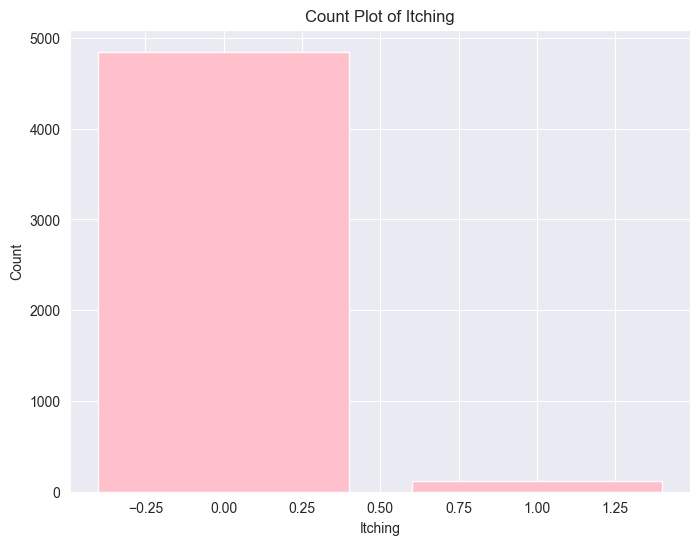

In [20]:
itching_counts = df['fluid_overload.1'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(itching_counts.index, itching_counts, color='pink')
plt.title('Count Plot of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
# plt.xticks(rotation=45)
plt.show()

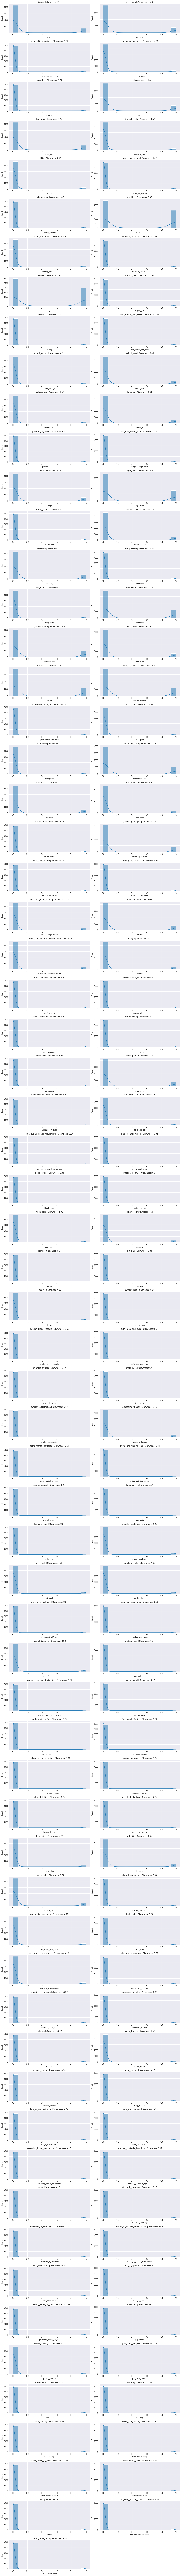

In [18]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

In [ ]:
# Box Plots
# fig, axs = plt.subplots(133,1,dpi=95, figsize=(7,17))
# i = 0
# for col in df.columns:
#     axs[i].boxplot(df[col], vert=False)
#     axs[i].set_ylabel(col)
#     i+=1
# plt.show()




numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(len(numeric_cols), figsize=(10, 5 * len(numeric_cols)))
fig.tight_layout(pad=3.0)

for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)

plt.show()

In [21]:
# Assuming df is your DataFrame and 'prognosis' is the column with the diseases
symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 
            'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 
            'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 
            'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 
            'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 
            'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 
            'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 
            'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 
            'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 
            'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 
            'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 
            'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 
            'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 
            'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 
            'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 
            'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 
            'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 
            'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 
            'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 
            'depression', 'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 
            'belly_pain', 'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 
            'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 
            'lack_of_concentration', 'visual_disturbances', 'receiving_blood_transfusion', 
            'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 
            'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum', 'prominent_veins_on_calf', 
            'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 
            'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 
            'red_sore_around_nose', 'yellow_crust_ooze']

# Check if 'fluid_overload' column exists and remove it
if 'fluid_overload' in df.columns:
    df = df.drop(columns=['fluid_overload'])

# Group by prognosis and calculate the mean for each symptom
summary = df.groupby('prognosis')[existing_symptoms].mean() * 100

# Format the summary as a list of strings
summary_list = []
for prognosis, row in summary.iterrows():
    symptoms_list = [(symptom, percentage) for symptom, percentage in row.items() if (percentage >= 20 and percentage < 0)]
    symptoms_list.sort(key=lambda x: x[1], reverse=True)
    formatted_symptoms = [f"{symptom}: {percentage:.1f}%" for symptom, percentage in symptoms_list]
    summary_list.append(f"- {prognosis}: [{', '.join(formatted_symptoms)}]")

# Display the summary list
for item in summary_list:
    print(item)

- AIDS: []
- Acne: []
- Alcoholic Hepatitis: []
- Allergy: []
- Arthritis: []
- Bronchial Asthma: []
- Cervical Spondylosis: []
- Chickenpox: []
- Chronic Cholestasis: []
- Common Cold: []
- Dengue: []
- Diabetes : []
- Dimorphic Hemmorhoids (piles): []
- Drug Reaction: []
- Fungal Infection: []
- GERD: []
- Gastroenteritis: []
- Heart Attack: []
- Hepatitis A: []
- Hepatitis B: []
- Hepatitis C: []
- Hepatitis D: []
- Hepatitis E: []
- Hypertension : []
- Hyperthyroidism: []
- Hypoglycemia: []
- Hypothyroidism: []
- Impetigo: []
- Jaundice: []
- Malaria: []
- Migraine: []
- Osteoarthritis: []
- Paralysis (brain hemorrhage): []
- Peptic Ulcer Disease: []
- Pneumonia: []
- Psoriasis: []
- Tuberculosis: []
- Typhoid: []
- Urinary Tract Infection: []
- Varicose Veins: []
- Vertigo: []


In [12]:
# Verify the column is removed
print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)
